In [83]:
from pathlib import Path

base_dir = Path('../../local/out/elpp/')

In [50]:
import pandas as pd

df = pd.read_feather(base_dir / 'exp3.feather')
tmp = df.apply(lambda x:x['Axiom'], result_type='expand', axis=1)
df = pd.merge(df, tmp, left_index=True, right_index=True).rename(columns={0: 'Operator', 1: 'Subclass', 2: 'Superclass'})
df

,Complexity threshold j,Complexity threshold k,KB,Complexity,Axiom,Expected,Predicted,Raw predicted,Operator,Subclass,Superclass
0,2,2,0,9,"[0, 4, 53]",1,1,0.566735,0,4,53
1,2,2,0,3,"[0, 7, 53]",1,1,0.508733,0,7,53
2,2,2,0,8,"[0, 9, 0]",1,1,0.591396,0,9,0
3,2,2,0,10,"[0, 9, 46]",1,0,0.222073,0,9,46
4,2,2,0,7,"[0, 9, 53]",1,0,0.499289,0,9,53
...,...,...,...,...,...,...,...,...,...,...,...
5909147,20,20,17,22,"[0, 96, 66]",1,1,0.901106,0,96,66
5909148,20,20,17,23,"[0, 98, 5]",1,1,0.907408,0,98,5
5909149,20,20,17,21,"[0, 98, 10]",1,1,0.962053,0,98,10
5909150,20,20,17,22,"[0, 98, 48]",1,1,0.776944,0,98,48


## Reasoner training complexity (j) and embeddings training complexity (k) vs recall on the test set >k

In [56]:
df[['Complexity threshold j', 'Complexity threshold k', 'Predicted']].groupby(['Complexity threshold j', 'Complexity threshold k']).mean().reset_index().pivot(index='Complexity threshold j', columns='Complexity threshold k', values='Predicted')


Complexity threshold k,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Complexity threshold j,,,,,,,,,,,,,,,,,,,
2,0.458808,0.522317,0.557624,0.586842,0.611023,0.650988,0.667914,0.698569,0.696061,0.708673,0.735640,0.754355,0.745028,0.745831,0.757547,0.738127,0.753496,0.747313,0.758789
3,0.474778,0.537641,0.573841,0.604816,0.628987,0.662024,0.679518,0.710197,0.709787,0.724724,0.746593,0.765684,0.752873,0.758119,0.770230,0.750421,0.769517,0.774869,0.768081
4,0.476290,0.541426,0.574417,0.603078,0.629548,0.660290,0.680549,0.711818,0.708057,0.731672,0.749829,0.770661,0.761544,0.767115,0.780268,0.760946,0.773411,0.781666,0.774212
5,0.469039,0.536534,0.569667,0.596425,0.623628,0.650778,0.668185,0.701196,0.691101,0.716100,0.734520,0.754813,0.743032,0.744514,0.758092,0.735685,0.753496,0.755856,0.748827
6,0.426112,0.489268,0.519720,0.550298,0.578821,0.609050,0.629033,0.660778,0.657708,0.674233,0.702906,0.722659,0.705526,0.710869,0.722144,0.699899,0.714551,0.717829,0.721429
7,0.419039,0.480314,0.509980,0.542651,0.566930,0.595701,0.612060,0.645293,0.641675,0.663153,0.685917,0.703274,0.689560,0.692730,0.702770,0.682300,0.698000,0.697437,0.701121
8,0.420107,0.479391,0.515929,0.546375,0.568717,0.596805,0.615748,0.644734,0.641559,0.663812,0.689091,0.713294,0.707591,0.709772,0.719110,0.694426,0.709949,0.708184,0.711850
9,0.400222,0.463328,0.492515,0.523436,0.551620,0.575363,0.594816,0.624776,0.624142,0.647640,0.674031,0.693648,0.680201,0.678760,0.690632,0.671943,0.685431,0.686966,0.682441
10,0.399733,0.464159,0.500480,0.526514,0.554427,0.578779,0.597093,0.630982,0.629794,0.656025,0.679694,0.699542,0.687702,0.685415,0.700280,0.674722,0.687909,0.691191,0.684453


## Reasoner training complexity (j) and embeddings training complexity (k) vs recall on the test set >20


In [104]:
summary = df.pivot(index=['KB', 'Operator', 'Subclass', 'Superclass'], columns=['Complexity threshold k', 'Complexity threshold j'], values='Predicted').dropna().mean(axis=0).reset_index().pivot(index='Complexity threshold j', columns='Complexity threshold k', values=0)
summary

Complexity threshold k,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Complexity threshold j,,,,,,,,,,,,,,,,,,,
2,0.466232,0.517387,0.546317,0.564422,0.570457,0.615193,0.625635,0.650829,0.638567,0.642016,0.668646,0.698534,0.690871,0.702079,0.724974,0.716640,0.740971,0.739822,0.758789
3,0.477728,0.527733,0.556854,0.573618,0.587987,0.624485,0.638854,0.662803,0.656672,0.664527,0.685889,0.713861,0.702654,0.720280,0.742504,0.728997,0.756394,0.767794,0.768081
4,0.484625,0.535971,0.559920,0.574193,0.591723,0.624485,0.642973,0.671041,0.659642,0.679184,0.695373,0.722291,0.713478,0.729668,0.753712,0.740109,0.760130,0.774691,0.774212
5,0.467286,0.519111,0.545263,0.556184,0.580132,0.609062,0.625060,0.654948,0.638759,0.655810,0.671999,0.700450,0.689530,0.702558,0.727081,0.711083,0.738385,0.747677,0.748827
6,0.421209,0.469106,0.490468,0.509244,0.526679,0.560686,0.578504,0.604751,0.598812,0.604368,0.629083,0.659450,0.642973,0.664815,0.686752,0.671137,0.697002,0.708497,0.721429
7,0.404732,0.448127,0.469968,0.495258,0.509819,0.540186,0.556184,0.585976,0.578312,0.589424,0.606763,0.632915,0.623048,0.642686,0.664240,0.651882,0.678609,0.686943,0.701121
8,0.416898,0.454833,0.482805,0.508190,0.514896,0.552735,0.565380,0.594693,0.582335,0.598046,0.614235,0.646709,0.642303,0.659450,0.680238,0.663569,0.690967,0.697864,0.711850
9,0.387489,0.430693,0.449564,0.473896,0.488361,0.520740,0.538462,0.563656,0.559632,0.569020,0.589616,0.618067,0.608775,0.623623,0.648434,0.639046,0.664910,0.676023,0.682441
10,0.382891,0.428202,0.458281,0.477632,0.494109,0.524476,0.539228,0.570074,0.564901,0.581761,0.598716,0.628030,0.618833,0.631670,0.659354,0.642016,0.667018,0.680142,0.684453


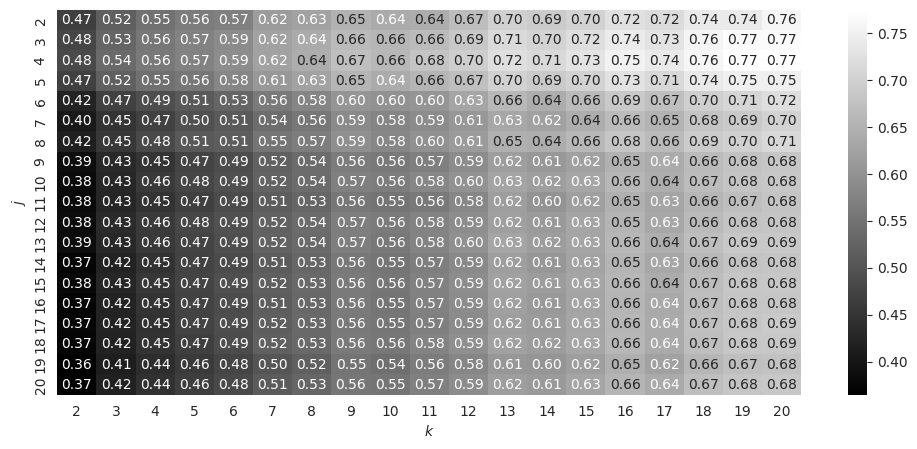

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.heatmap(summary, annot=True, fmt=".2f", cmap='gist_gray')
ax.set_xlabel('$k$')
ax.set_ylabel('$j$')
plt.savefig(base_dir / 'exp3.pdf', dpi=300)

# KB = dataset, (j, k) = classifier

This results in $19^2\cdot (19^2-1)/2=64,980$ comparisons. Assuming family-wise error rate $0.05$ and the Bonferroni correction, the significance level would be $0.05/64980=7.69\cdot 10^{-7}$ and that clearly makes no sense whatsoever.


In [101]:
summary = df.pivot(index=['KB', 'Operator', 'Subclass', 'Superclass'], columns=['Complexity threshold j', 'Complexity threshold k'], values='Predicted').dropna().reset_index().drop(columns=['Operator', 'Subclass', 'Superclass']).groupby('KB').mean()
summary.columns = summary.columns.to_flat_index()
summary

/home/smaug/.virtualenvs/reasonable-embeddings/lib/python3.9/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,"(2, 2)","(2, 3)","(2, 4)","(2, 5)","(2, 6)","(2, 7)","(2, 8)","(2, 9)","(2, 10)","(2, 11)",...,"(20, 11)","(20, 12)","(20, 13)","(20, 14)","(20, 15)","(20, 16)","(20, 17)","(20, 18)","(20, 19)","(20, 20)"
KB,,,,,,,,,,,,,,,,,,,,,
0,0.400000,0.400000,0.400000,0.600000,0.600000,0.800000,1.000000,0.600000,0.800000,0.800000,...,1.000000,0.800000,0.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.327586,0.267241,0.353448,0.474138,0.439655,0.577586,0.517241,0.534483,0.629310,0.560345,...,0.663793,0.629310,0.681034,0.706897,0.715517,0.775862,0.818966,0.775862,0.836207,0.793103
2,0.422158,0.455467,0.439537,0.431571,0.430123,0.459088,0.474294,0.506879,0.485156,0.458364,...,0.558291,0.593049,0.614772,0.583635,0.591600,0.664736,0.628530,0.633599,0.649529,0.668356
3,0.247273,0.341818,0.305455,0.349091,0.407273,0.410909,0.440000,0.432727,0.440000,0.465455,...,0.567273,0.530909,0.647273,0.665455,0.672727,0.654545,0.709091,0.760000,0.785455,0.756364
4,0.293103,0.327586,0.465517,0.534483,0.620690,0.603448,0.793103,0.603448,0.689655,0.827586,...,0.844828,0.672414,0.758621,0.810345,0.689655,0.637931,0.620690,0.672414,0.724138,0.724138
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.500000,1.000000
7,0.105263,0.368421,0.210526,0.421053,0.157895,0.315789,0.473684,0.421053,0.473684,0.473684,...,0.578947,0.578947,0.473684,0.684211,0.631579,0.736842,0.736842,0.736842,0.684211,0.789474
8,0.400000,0.650000,0.500000,0.500000,0.700000,0.400000,0.450000,0.450000,0.500000,0.350000,...,0.750000,0.850000,0.950000,0.900000,0.950000,0.950000,1.000000,0.900000,1.000000,0.950000
9,0.561947,0.584071,0.595870,0.657817,0.638643,0.634218,0.859882,0.890855,0.895280,0.833333,...,0.654867,0.638643,0.713864,0.718289,0.705015,0.747788,0.724189,0.740413,0.682891,0.802360


In [94]:
from scipy.stats import friedmanchisquare

friedmanchisquare(*summary.to_numpy())


FriedmanchisquareResult(statistic=3111.4379543421246, pvalue=0.0)

In [102]:
import scikit_posthocs as sp

sp.posthoc_nemenyi_friedman(summary, melted=False) #.to_numpy())

,"(2, 2)","(2, 3)","(2, 4)","(2, 5)","(2, 6)","(2, 7)","(2, 8)","(2, 9)","(2, 10)","(2, 11)",...,"(20, 11)","(20, 12)","(20, 13)","(20, 14)","(20, 15)","(20, 16)","(20, 17)","(20, 18)","(20, 19)","(20, 20)"
"(2, 2)",1.000000,0.90000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,...,0.9,0.9,0.112170,0.035428,0.001971,0.001000,0.002283,0.001000,0.001,0.001
"(2, 3)",0.900000,1.00000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,...,0.9,0.9,0.135184,0.045434,0.002647,0.001000,0.003070,0.001000,0.001,0.001
"(2, 4)",0.900000,0.90000,1.000000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,...,0.9,0.9,0.291898,0.109477,0.008302,0.001000,0.009567,0.001000,0.001,0.001
"(2, 5)",0.900000,0.90000,0.900000,1.000000,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,...,0.9,0.9,0.900000,0.900000,0.084042,0.013015,0.089570,0.002547,0.001,0.001
"(2, 6)",0.900000,0.90000,0.900000,0.900000,1.000000,0.900000,0.900000,0.900000,0.900000,0.900000,...,0.9,0.9,0.900000,0.478110,0.065330,0.009526,0.073527,0.001827,0.001,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(20, 16)",0.001000,0.00100,0.001000,0.013015,0.009526,0.276708,0.900000,0.449714,0.900000,0.900000,...,0.9,0.9,0.900000,0.900000,0.900000,1.000000,0.900000,0.900000,0.900,0.900
"(20, 17)",0.002283,0.00307,0.009567,0.089570,0.073527,0.900000,0.900000,0.900000,0.900000,0.900000,...,0.9,0.9,0.900000,0.900000,0.900000,0.900000,1.000000,0.900000,0.900,0.900
"(20, 18)",0.001000,0.00100,0.001000,0.002547,0.001827,0.087714,0.900000,0.157512,0.900000,0.900000,...,0.9,0.9,0.900000,0.900000,0.900000,0.900000,0.900000,1.000000,0.900,0.900
"(20, 19)",0.001000,0.00100,0.001000,0.001000,0.001000,0.025940,0.224654,0.051364,0.270699,0.429344,...,0.9,0.9,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,1.000,0.900
